In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [26]:
dataset_path = 'dm_stories_tokenized/'
files = os.listdir(dataset_path)

In [27]:
print(open(dataset_path + files[0]).read())

Will children of the future be taught solely by a computer ? That could be a possibility , according to Google 's vice-president of research Alfred Spector .

He said he thinks apps and technologies that are widely derided as being distracting could actually improve how we learn .

And he says this may lead to a future where students do not need to go to school in order to get a formal education .

Google 's Alfred Spector -LRB- shown -RRB- says technology could replace teachers in future . He made the comments at the World-Changing Ideas Summit in New York . Tech we usually find distracting could be used to help students learn . He says even simple apps could improve their educational experience -LRB- stock image shown -RRB-

Speaking at the BBC 's World-Changing Ideas Summit in New York earlier this week , he said even simple apps could improve education .

He points to apps already on the market like Duolingo , which teaches languages through games , as beginning the shift to techno

In [28]:
documents = []
summaries = []
summary_lengths = {}

for i in range(len(files)):
    filename = files[i]
    in_summary = False
    summary = []
    document = []
    with open(dataset_path + filename, 'r') as file:
        lines = file.readlines()
        for line in lines:        
            line = line.strip()
            if '@highlight' in line:
                in_summary = True
                continue
                
            if (len(line) == 0):
                continue
                
            if in_summary:
                summary.append(line)
            else:
                document.append(line)
        file.close()
        
    documents.append('. '.join(document))
    summaries.append('. '.join(summary))
        
    if str(len(summary)) in summary_lengths:
        summary_lengths[str(len(summary))].append(i)
    else:
        summary_lengths[str(len(summary))] = [i]
        

In [29]:
print("DOC: ----- \n" + documents[0])
print("SUMMARY: ----- \n" + summaries[0])
print("LENGTHS: -----\n" + str(summary_lengths))

DOC: ----- 
Will children of the future be taught solely by a computer ? That could be a possibility , according to Google 's vice-president of research Alfred Spector .. He said he thinks apps and technologies that are widely derided as being distracting could actually improve how we learn .. And he says this may lead to a future where students do not need to go to school in order to get a formal education .. Google 's Alfred Spector -LRB- shown -RRB- says technology could replace teachers in future . He made the comments at the World-Changing Ideas Summit in New York . Tech we usually find distracting could be used to help students learn . He says even simple apps could improve their educational experience -LRB- stock image shown -RRB-. Speaking at the BBC 's World-Changing Ideas Summit in New York earlier this week , he said even simple apps could improve education .. He points to apps already on the market like Duolingo , which teaches languages through games , as beginning the shi

In [38]:
def plot_topic_range_error(summary_length, topic_range, summary_lengths, documents, summaries):
    filtered_ids = summary_lengths[summary_length]
    print('There are ' + str(len(filtered_ids)) + ' summaries of length ' + str(summary_length) + '.')
    filtered_documents = [documents[doc_id] for doc_id in filtered_ids]
    filtered_summaries = [summaries[doc_id] for doc_id in filtered_ids]
    errors = {}

    for num_topics in topic_range:
        print('Training on: ' + str(num_topics) + ' topics.')
        document_vectorizer = CountVectorizer()
        summary_vectorizer = CountVectorizer()

        doc_vector = document_vectorizer.fit_transform(filtered_documents)
        summ_vector = summary_vectorizer.fit_transform(filtered_summaries)

        document_lda = LDA(n_components=num_topics, learning_method='online')
        summary_lda = LDA(n_components=num_topics, learning_method='online')

        document_lda.fit(doc_vector)
        summary_lda.fit(summ_vector)

        doc_topics = document_lda.transform(doc_vector)
        summ_topics = summary_lda.transform(summ_vector)

        for doc_id in range(len(filtered_ids)):
            topic_error = sum(np.square(doc_topics[doc_id] - summ_topics[doc_id])) / (num_topics * len(filtered_ids))

            if num_topics in errors:
                errors[num_topics] += topic_error
            else:
                errors[num_topics] = topic_error

    topic_errors = [errors[n_topics] for n_topics in errors]
    plt.plot(topic_range, topic_errors)
    plt.xlabel('Number of Topics')
    plt.ylabel('Normalized Sum of Squared Errors')
    plt.title('Length: ' + summary_length + ' Sentences')

There are 57 summaries of length 2.
Training on: 2 topics.
Training on: 3 topics.
Training on: 4 topics.
Training on: 5 topics.
Training on: 6 topics.
Training on: 7 topics.
Training on: 8 topics.
Training on: 9 topics.


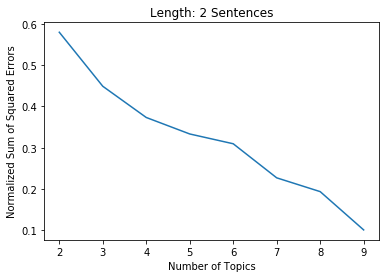

In [46]:
plot_topic_range_error('2', np.arange(2, 10), summary_lengths, documents, summaries)

There are 185 summaries of length 3.
Training on: 2 topics.
Training on: 3 topics.
Training on: 4 topics.
Training on: 5 topics.
Training on: 6 topics.
Training on: 7 topics.
Training on: 8 topics.
Training on: 9 topics.


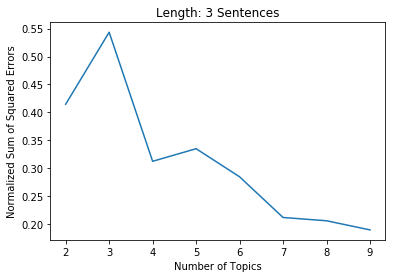

In [45]:
plot_topic_range_error('3', np.arange(2, 10), summary_lengths, documents, summaries)

There are 147 summaries of length 4.
Training on: 2 topics.
Training on: 3 topics.
Training on: 4 topics.
Training on: 5 topics.
Training on: 6 topics.
Training on: 7 topics.
Training on: 8 topics.
Training on: 9 topics.


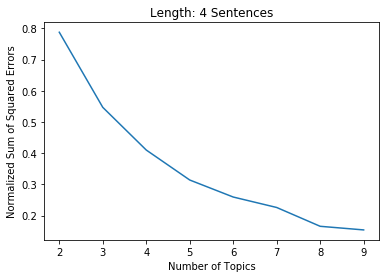

In [42]:
plot_topic_range_error('4', np.arange(2, 10), summary_lengths, documents, summaries)

There are 94 summaries of length 5.
Training on: 2 topics.
Training on: 3 topics.
Training on: 4 topics.
Training on: 5 topics.
Training on: 6 topics.
Training on: 7 topics.
Training on: 8 topics.
Training on: 9 topics.


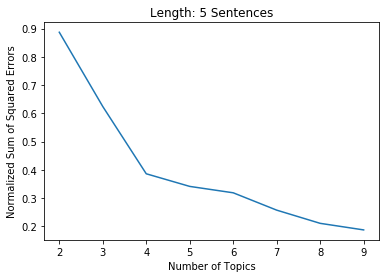

In [44]:
plot_topic_range_error('5', np.arange(2, 10), summary_lengths, documents, summaries)